In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("bv_ds_case_study_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6604 entries, 0 to 6603
Data columns (total 18 columns):
client_id                       6604 non-null int64
pit                             6604 non-null object
period                          6604 non-null object
recent_successful_repayments    6562 non-null float64
future_bad_probability          6604 non-null float64
available_credit                6484 non-null float64
balance                         6502 non-null float64
sum_failed_repayments           6368 non-null float64
max_failed_repayments           6368 non-null float64
credit_score                    5809 non-null float64
external score                  6604 non-null float64
credit_inquiries_count          5782 non-null float64
credit_open_balance             5753 non-null float64
years_on_file                   5406 non-null object
max_successful_repayments       3480 non-null float64
missing_report                  6604 non-null int64
client_industry_unknown         6604

In [3]:
df.head(1)

,client_id,pit,period,recent_successful_repayments,future_bad_probability,available_credit,balance,sum_failed_repayments,max_failed_repayments,credit_score,external score,credit_inquiries_count,credit_open_balance,years_on_file,max_successful_repayments,missing_report,client_industry_unknown,tag_in_six_months
0,14641,6/1/17,first_funded+120,4433.057859,0.964439,3605.636757,16405.9972,887.338879,667.062255,612.0,884.0,13.0,64384.0,between 3 and 5 years,0.0,0,0,bad


In [4]:
df['credit_score'].min()


-10003.0

In [5]:
df['credit_score'].max()

9002.0

In [6]:
df['external score'].min()

-15038.5

In [7]:
df['external score'].max()

13469.0

In [8]:
df['external score'].sort_values(ascending=True)

6541   -15038.5
2205   -15037.0
3186      -34.0
2408      -34.0
4119      -34.0
1807      -34.0
4800      -34.0
4121      -34.0
575       -34.0
2405      -34.0
5367      -34.0
4123      -34.0
4799      -34.0
5370      -34.0
2399      -34.0
4131      -34.0
2392      -34.0
4796      -34.0
4136      -34.0
5678      -34.0
4143      -34.0
4146      -34.0
591       -34.0
1017      -34.0
4114      -34.0
2414      -34.0
567       -34.0
2418      -34.0
5246      -34.0
4037      -34.0
         ...   
4480     1175.0
578      1175.0
4395     1175.0
3436     1175.0
6022     1175.0
3655     1176.5
6594     1179.5
2470     1179.5
603      1179.5
6513     1179.5
3125     1181.0
3483     1182.5
3252     1182.5
5835     1184.0
2376     1184.0
3359     1185.5
1644     1185.5
3032     1190.0
2101     1191.5
5714     1194.5
1395     1196.0
5472     1196.0
4492     1197.5
2423     1199.0
4088     1200.5
4587     1203.5
3914     1211.0
3868     1215.5
2288     1217.0
1613    13469.0
Name: external score, Le

In [9]:
df.loc[(df['credit_score'] < 0) , 'credit_score'] = np.nan


In [10]:
df.loc[(df['credit_score'] ==9002.0) , 'credit_score'] = 902.0

df.loc[(df['external score'] ==13469.0) , 'credit_score'] = 1369.0


In [11]:
df['external score'].sort_values(ascending=True).head(800)

6541   -15038.5
2205   -15037.0
3186      -34.0
2408      -34.0
4119      -34.0
1807      -34.0
4800      -34.0
4121      -34.0
575       -34.0
2405      -34.0
5367      -34.0
4123      -34.0
4799      -34.0
5370      -34.0
2399      -34.0
4131      -34.0
2392      -34.0
4796      -34.0
4136      -34.0
5678      -34.0
4143      -34.0
4146      -34.0
591       -34.0
1017      -34.0
4114      -34.0
2414      -34.0
567       -34.0
2418      -34.0
5246      -34.0
4037      -34.0
         ...   
5005      -34.0
3657      -34.0
6437      -34.0
2793      -34.0
6435      -34.0
4962      -34.0
1328      -34.0
5581      -34.0
2875      -34.0
5577      -34.0
5009      -34.0
2807      -34.0
5345      -34.0
6434      -34.0
1637      -34.0
2843      -34.0
2802      -34.0
3644      -34.0
6431      -34.0
6411      -34.0
2872      -34.0
2803      -34.0
6406      -34.0
6407      -34.0
6430      -34.0
4964      -34.0
1111      -34.0
341       666.5
471       669.5
1604      677.0
Name: external score, Le

In [12]:
df.columns

Index(['client_id', 'pit', 'period', 'recent_successful_repayments',
       'future_bad_probability', 'available_credit', 'balance',
       'sum_failed_repayments ', 'max_failed_repayments', 'credit_score',
       'external score', 'credit_inquiries_count', 'credit_open_balance',
       'years_on_file', 'max_successful_repayments', 'missing_report',
       'client_industry_unknown', 'tag_in_six_months'],
      dtype='object')

In [13]:
df.isnull().sum()

client_id                          0
pit                                0
period                             0
recent_successful_repayments      42
future_bad_probability             0
available_credit                 120
balance                          102
sum_failed_repayments            236
max_failed_repayments            236
credit_score                     797
external score                     0
credit_inquiries_count           822
credit_open_balance              851
years_on_file                   1198
max_successful_repayments       3124
missing_report                     0
client_industry_unknown            0
tag_in_six_months                  0
dtype: int64

In [15]:
df.drop(['external score'], axis=1, inplace=True)
df.drop(['missing_report','client_industry_unknown'], axis=1, inplace=True)

In [16]:
df.drop(['max_successful_repayments','available_credit'], axis=1, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6604 entries, 0 to 6603
Data columns (total 13 columns):
client_id                       6604 non-null int64
pit                             6604 non-null object
period                          6604 non-null object
recent_successful_repayments    6562 non-null float64
future_bad_probability          6604 non-null float64
balance                         6502 non-null float64
sum_failed_repayments           6368 non-null float64
max_failed_repayments           6368 non-null float64
credit_score                    5807 non-null float64
credit_inquiries_count          5782 non-null float64
credit_open_balance             5753 non-null float64
years_on_file                   5406 non-null object
tag_in_six_months               6604 non-null object
dtypes: float64(8), int64(1), object(4)
memory usage: 670.8+ KB


In [18]:
df.replace('n/a', np.nan, inplace=True)
years_on_file = {"0":0 ,"less than 0.5 year" :0.5,"between 0.5 and 1 years":1,"between 1 and 1.5 years":1.5,"between 1.5 and 2 years":2,"between 2 and 2.5 years":2.5
                ,"between 2.5 and 3 years":3,"between 3 and 5 years":5,"between 5 and 6 years":6,"between 6 and 8 years":8,"between 8 and 10 years":10
                 ,"between 10 and 12 years":12,"between 12 and 14 years":14,"between 14 and 17 years":17,"between 17 and 20 years":20
                 ,"between 20 and 25 years":25,"between 25 and 30 years":30,"between 30 and 35 years":35,"more than 35 years":40}

df['years_on_file'] = df['years_on_file'].replace(years_on_file)
# now convert the types
df['years_on_file'] = df['years_on_file'].convert_objects(convert_numeric=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [19]:
cor = df.corr()
cor

,client_id,recent_successful_repayments,future_bad_probability,balance,sum_failed_repayments,max_failed_repayments,credit_score,credit_inquiries_count,credit_open_balance,years_on_file
client_id,1.000000,0.080560,-0.027130,0.048755,0.022368,0.027949,-0.042440,-0.041326,0.020192,0.035404
recent_successful_repayments,0.080560,1.000000,-0.081206,0.480812,-0.035522,-0.001109,0.055112,-0.000109,0.062674,0.046441
future_bad_probability,-0.027130,-0.081206,1.000000,0.094490,0.225285,0.144029,-0.128621,0.189617,-0.047602,-0.019739
balance,0.048755,0.480812,0.094490,1.000000,0.110058,0.074210,-0.019322,0.090847,0.050942,0.020770
sum_failed_repayments,0.022368,-0.035522,0.225285,0.110058,1.000000,0.781213,-0.040646,0.109457,-0.006038,-0.012123
max_failed_repayments,0.027949,-0.001109,0.144029,0.074210,0.781213,1.000000,0.011651,0.067178,-0.001785,-0.000262
credit_score,-0.042440,0.055112,-0.128621,-0.019322,-0.040646,0.011651,1.000000,-0.239375,0.056268,0.068956
credit_inquiries_count,-0.041326,-0.000109,0.189617,0.090847,0.109457,0.067178,-0.239375,1.000000,0.012226,-0.032147
credit_open_balance,0.020192,0.062674,-0.047602,0.050942,-0.006038,-0.001785,0.056268,0.012226,1.000000,0.127362
years_on_file,0.035404,0.046441,-0.019739,0.020770,-0.012123,-0.000262,0.068956,-0.032147,0.127362,1.000000


In [20]:
np.tril(cor, k=-1)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  8.05604673e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [ -2.71299350e-02,  -8.12059092e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  4.87553959e-02,   4.80811510e-01,   9.44896156e-02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  2.23679358e-02,  -3.55220966e-02,   2.25284801e-01,
          1.10058441e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00

In [21]:
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array



In [22]:
cor = cor.stack()
cor

client_id                     client_id                       0.000000
                              recent_successful_repayments    0.000000
                              future_bad_probability          0.000000
                              balance                         0.000000
                              sum_failed_repayments           0.000000
                              max_failed_repayments           0.000000
                              credit_score                    0.000000
                              credit_inquiries_count          0.000000
                              credit_open_balance             0.000000
                              years_on_file                   0.000000
recent_successful_repayments  client_id                       0.080560
                              recent_successful_repayments    0.000000
                              future_bad_probability          0.000000
                              balance                         0.000000
      

In [23]:
cor[(cor > 0.55) | (cor < -0.55)]

max_failed_repayments  sum_failed_repayments     0.781213
dtype: float64

In [24]:
df.drop(['max_failed_repayments'], axis=1, inplace=True) 

In [25]:
mapping = {'good': 1, 'bad': 0}
df = df.replace({'tag_in_six_months': mapping})

In [26]:
df_120 = df[df['period']=='first_funded+120']
df_120 = df_120.drop(['period','pit'], axis=1)


In [27]:
df_180 = df[df['period']=='first_funded+180']
df_180 = df_180.drop(['period','pit'], axis=1)

In [28]:
columns = df_120.columns[df_120.isnull().any()]
columns 

Index(['recent_successful_repayments', 'balance', 'sum_failed_repayments ',
       'credit_score', 'credit_inquiries_count', 'credit_open_balance',
       'years_on_file'],
      dtype='object')

In [44]:
def fillnan(df):
    columns = df.columns[df.isnull().any()]
    for name in columns:
        y = df.loc[df[name].notnull(), name].values
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values
        if df[name].dtypes == 'object':
            model = RandomForestClassifier(n_estimators=400, max_depth=3)
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = RandomForestRegressor(n_estimators=400, max_depth=3)
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [ ]:
fillnan(df_120)
fillnan(df_180)

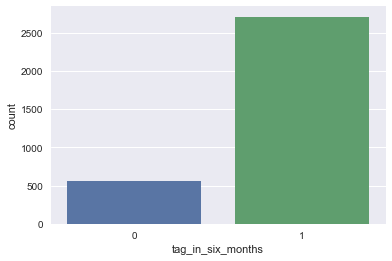

In [46]:
sns.countplot(df_120['tag_in_six_months'])

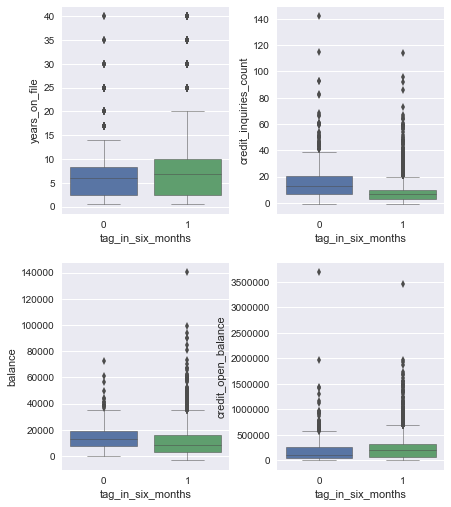

In [47]:
columns = ['years_on_file','credit_inquiries_count','balance','credit_open_balance']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
plt.tight_layout(w_pad=2.0, h_pad=3.0)

for i, column in zip(range(1,5), columns):
    plt.subplot(2,2,i)
    sns.boxplot(x="tag_in_six_months", y=column, data=df_120, linewidth=0.5)
    plt.xlabel('tag_in_six_months')

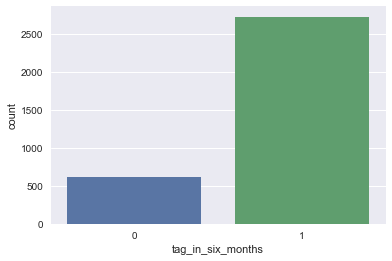

In [48]:
sns.countplot(df_180['tag_in_six_months'])

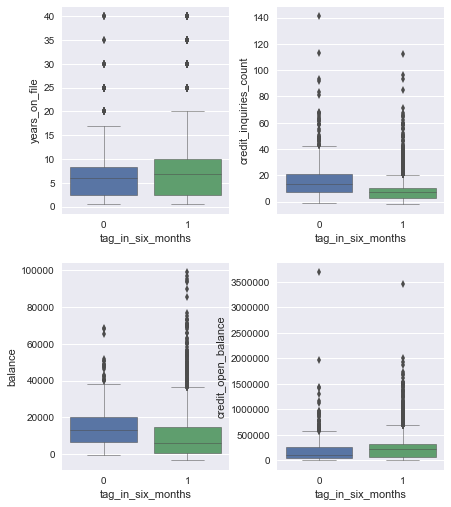

In [49]:
columns = ['years_on_file','credit_inquiries_count','balance','credit_open_balance']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
plt.tight_layout(w_pad=2.0, h_pad=3.0)

for i, column in zip(range(1,5), columns):
    plt.subplot(2,2,i)
    sns.boxplot(x="tag_in_six_months", y=column, data=df_180, linewidth=0.5)
    plt.xlabel('tag_in_six_months')

In [50]:
# X_train_120_imbalance, X_test_120_imbalance, y_train_120_imbalance, y_test_120_imbalance = train_test_split(X_resampled_120, y_resampled_120, test_size = 0.25, random_state=0)

# model_imbalance = RandomForestClassifier(n_estimators=200)
# model_120_imbalance = model_imbalance.fit(X_train_120_imbalance, y_train_120_imbalance)
# predict_120_imbalance = model_imbalance.predict(X_test_120_imbalance)
# print(classification_report(y_test_120_imbalance, predict_120_imbalance))

In [51]:
y_120 = df_120['tag_in_six_months'].values
X_120 = df_120.drop(['tag_in_six_months'], axis=1).values
X_train_120, X_test_120, y_train_120, y_test_120 = train_test_split(X_120, y_120, test_size = 0.25, random_state=0)

In [52]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(ratio = 1.0)

In [53]:
X_resampled_120, y_resampled_120 = sm.fit_sample(X_train_120, y_train_120)


/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


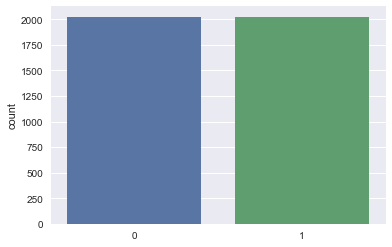

In [54]:
sns.countplot(y_resampled_120)

In [55]:

model = RandomForestClassifier(n_estimators=200)
model_120 = model.fit(X_resampled_120, y_resampled_120)
predict_120 = model.predict(X_test_120)
print(classification_report(y_test_120, predict_120))

             precision    recall  f1-score   support

          0       0.83      0.90      0.86       135
          1       0.98      0.96      0.97       681

avg / total       0.95      0.95      0.95       816



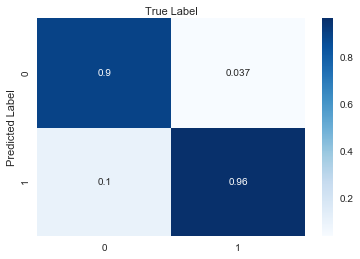

In [56]:
cm_120 = confusion_matrix(y_test_120, predict_120).T
cm_120 = cm_120.astype('float')/cm_120.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm_120, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

In [57]:
sm = SMOTE(random_state=12, ratio = 1.0)

In [58]:
y_180 = df_180['tag_in_six_months'].values
X_180 = df_180.drop(['tag_in_six_months'], axis=1).values
X_train_180, X_test_180, y_train_180, y_test_180 = train_test_split(X_180, y_180, test_size = 0.25, random_state=0)

X_resampled_180, y_resampled_180 = sm.fit_sample(X_train_180, y_train_180)

model = RandomForestClassifier(n_estimators=200)
model_180 = model.fit(X_resampled_180, y_resampled_180)
predict_180 = model.predict(X_test_180)
print(classification_report(y_test_180, predict_180))

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.91      0.90      0.90       158
          1       0.98      0.98      0.98       678

avg / total       0.96      0.96      0.96       836



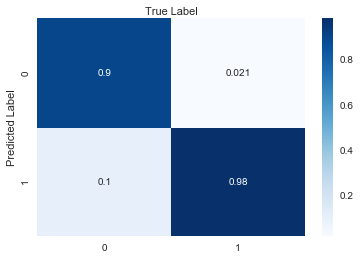

In [59]:
cm_180 = confusion_matrix(y_test_180, predict_180).T
cm_180 = cm_180.astype('float')/cm_180.sum(axis=0)

fig, ax = plt.subplots()
sns.heatmap(cm_180, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.xaxis.set_label_position('top')

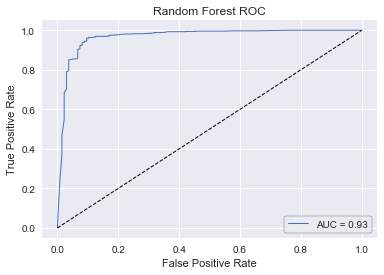

In [60]:
fpr_120, tpr_120, thresholds_120 = roc_curve(y_test_120, model_120.predict_proba(X_test_120)[:,1])
roc_auc = roc_auc_score(y_test_120, predict_120)

plt.plot(fpr_120, tpr_120, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

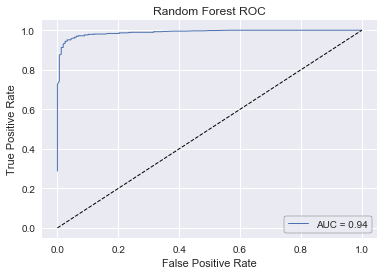

In [61]:
fpr_180, tpr_180, thresholds_180 = roc_curve(y_test_180, model_180.predict_proba(X_test_180)[:,1])
roc_auc = roc_auc_score(y_test_180, predict_180)

plt.plot(fpr_180, tpr_180, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

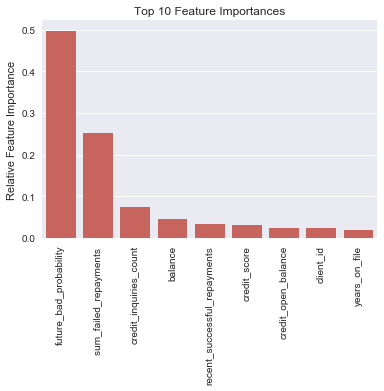

In [62]:
feat_labels = df_120.drop('tag_in_six_months', axis=1).columns
importances = model_120.feature_importances_
indices = np.argsort(importances)[::-1]

ncomp = 20
sns.barplot(x=feat_labels[indices[:ncomp]], y=importances[indices[:ncomp]], color=sns.xkcd_rgb["pale red"])
plt.title('Top 10 Feature Importances')
plt.ylabel('Relative Feature Importance')
plt.xticks(rotation=90)